# Projeto Módulo 1

## Justificativa
Este estudo será voltado para a região SUL, onde iremos analisar o valor utilizado em procedimentos hospitalares com a quantidade de internações realizadas no período de MAR/2018 a MAR/2021.

## Preparando o ambiente de análise.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
pd.options.display.float_format = "{:.2f}".format
plt.style.use('seaborn')

In [3]:
df_internacoes = pd.read_csv('https://raw.githubusercontent.com/jurasseck/bootcamp-alura-ds-modulo-1/main/dados/internacoes_ano_mes_processamento.csv', encoding='ISO-8859-1', skiprows=3, sep=';', skipfooter=12, thousands='.', decimal=',', engine='python')
df_valores = pd.read_csv('https://raw.githubusercontent.com/jurasseck/bootcamp-alura-ds-modulo-1/main/dados/db_uf_ano_mes_processamento.csv', encoding='ISO-8859-1', skiprows=3, sep=';', skipfooter=12, thousands='.', decimal=',', engine='python')

In [4]:
df_internacoes = df_internacoes.drop('Total', axis = 1)
df_valores = df_valores.drop('Total', axis = 1)

In [5]:
def definir_regioes(uf):
  if (uf.startswith("1")):
    return "Norte"
  elif (uf.startswith("2")):
    return "Nordeste"
  elif (uf.startswith("3")):
    return "Sudeste"
  elif (uf.startswith("4")):
    return "Sul"
  elif (uf.startswith("5")):
    return "Centro Oeste"

Adicionamos a região que cada estado pertence para depois selecionarmos a região do estudo.

In [6]:
regioes = []
for row in df_internacoes.index:
  regioes.insert(row, definir_regioes(df_internacoes['Unidade da Federação'][row]))
df_internacoes["Região"] = regioes

regioes = []
for row in df_valores.index:
  regioes.insert(row, definir_regioes(df_valores['Unidade da Federação'][row]))
df_valores["Região"] = regioes

df_internacoes = df_internacoes.set_index('Unidade da Federação')
df_valores = df_valores.set_index('Unidade da Federação')

Selecionamos a região SUL e o período de Março de 2018 a Março de 2021

In [7]:
df_internacoes_sul_data = df_internacoes.loc[df_internacoes['Região'] == 'Sul']
df_valores_sul_data = df_valores.loc[df_valores['Região'] == 'Sul']

In [8]:
df_internacoes_sul_range = df_internacoes_sul_data.loc[:,'2018/Mar':'2021/Mar']
df_valores_sul_range = df_valores_sul_data.loc[:,'2018/Mar':'2021/Mar']

##Dados

In [9]:
df_internacoes_sul_range

,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41 Paraná,71795,73214,73085,72760,74451,74103,73357,74028,74335,69396,72424,70915,72807,72330,75849,73282,75158,73834,74501,74980,74003,69531,72379,73852,67487,55136,59843,51876,55264,58442,59155,63596,62995,56858,58777,63223,59861
42 Santa Catarina,41757,41428,41710,42888,42849,43170,41185,41816,39606,38206,40755,38940,39919,41215,44436,42921,45213,44708,44074,45214,42794,40567,39972,41665,39419,31493,31181,32801,32084,32390,34272,35430,36663,35266,36345,35925,35620
43 Rio Grande do Sul,61995,62533,62498,62037,64053,64525,63580,62715,61241,59573,59533,59283,60253,62291,65673,65334,68165,68263,65798,68534,62678,61288,63760,61605,63508,50991,50177,50998,53202,52509,52539,59214,57284,55811,56731,54143,54463


In [10]:
df_valores_sul_range

,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41 Paraná,116630188.99,120061032.48,121360733.68,122174618.88,124610255.04,127874482.35,123933024.51,125316844.05,125317336.68,117528767.93,122460918.04,119836506.38,123286810.02,120177202.18,126481772.97,125528571.51,125978907.59,126174536.45,126966338.94,131587683.74,127099316.24,117905826.73,122357489.56,127010218.52,117317015.92,94604541.30,107506194.76,96981983.22,109720663.59,129529222.48,122702263.26,129647873.97,126859051.02,120037066.76,122122779.12,132622112.72,140264608.52
42 Santa Catarina,58770698.10,60288827.83,60659252.20,62213666.20,61278050.72,62730906.87,61636890.45,63327187.97,59766664.18,55708713.29,58896965.31,57420491.79,58250110.95,61028085.60,64937709.40,63504945.54,66591656.76,68439538.79,67131286.74,67946962.52,62694674.96,62400948.72,60255326.83,63695794.11,61835940.53,51632371.91,55188294.77,57897436.61,61267297.89,65467585.93,71781494.82,69414431.71,68460616.55,70333079.37,71970474.56,74337524.03,81376630.57
43 Rio Grande do Sul,87419899.25,89396935.52,88148251.61,90754504.49,89093690.14,94010888.97,93664724.68,90025945.36,93081292.31,89050712.34,89664703.23,89259306.50,85585754.75,95152786.47,94163838.23,92237333.46,102298314.76,100260145.30,95917106.56,102331615.05,93971904.79,90775418.13,94908336.74,91437940.91,102876132.83,83000318.02,82381774.95,86092502.24,100579287.65,102609965.59,104401019.54,117458292.46,108853890.98,111760506.80,119992419.94,111797400.70,130155185.16


##Análise

Com o ambiente definido, podemos começar nosso estudo.

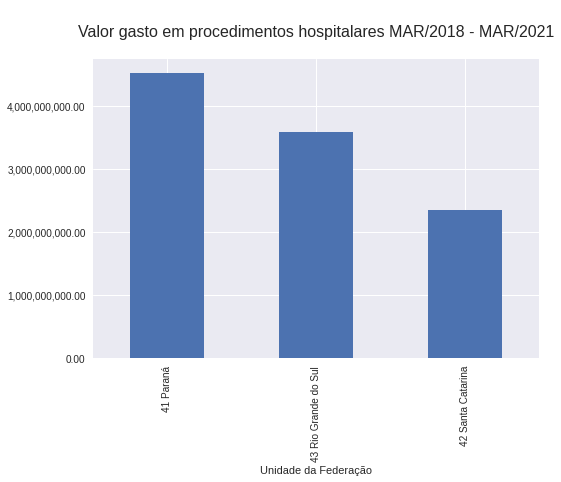

In [11]:
ax = df_valores_sul_range.sum(axis=1).sort_values(ascending=False).plot(kind='bar')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title('\nValor gasto em procedimentos hospitalares MAR/2018 - MAR/2021\n', fontsize=16)
plt.show()

Procuramos saber qual estado teve maior gasto durante o periodo.

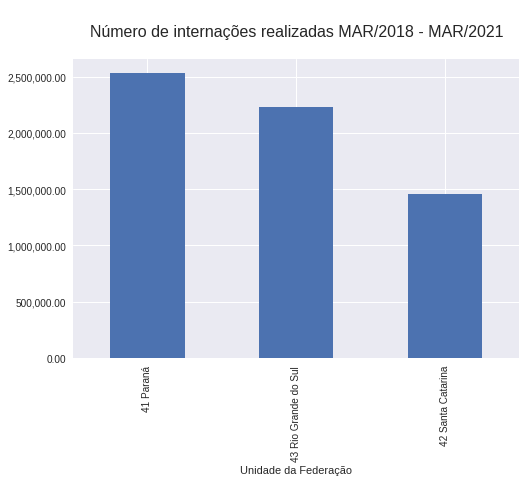

In [12]:
ax = df_internacoes_sul_range.sum(axis=1).sort_values(ascending=False).plot(kind='bar')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title('\nNúmero de internações realizadas MAR/2018 - MAR/2021\n', fontsize=16)
plt.show()

Procuramos saber também, qual o estado que realizou o maior número de internações.

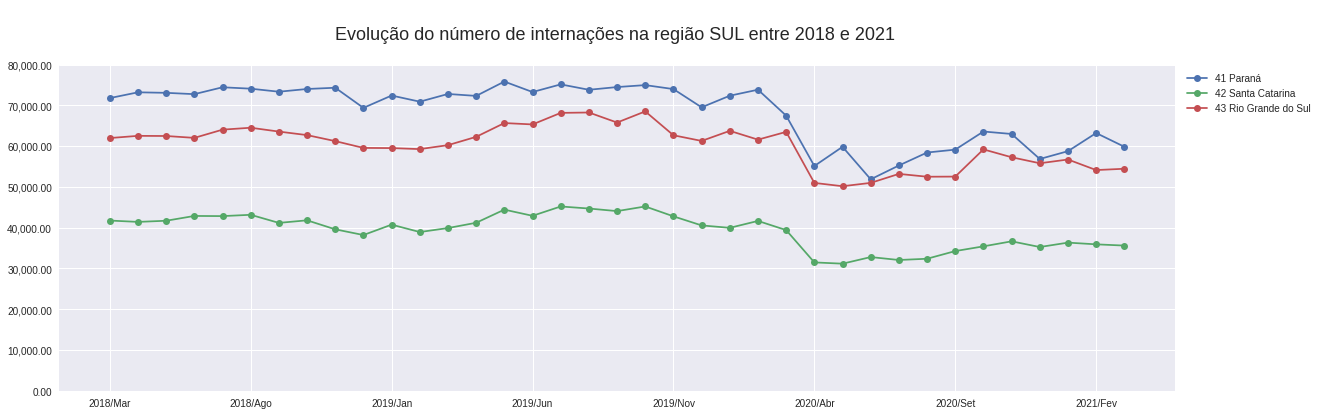

In [13]:
ax = df_internacoes_sul_range.T.plot(figsize=(20,6), marker='o')
plt.title('\nEvolução do número de internações na região SUL entre 2018 e 2021 \n', fontsize=18)
plt.legend(loc='upper right', bbox_to_anchor=(1.13, 1))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.ylim(0,80000)
plt.show()

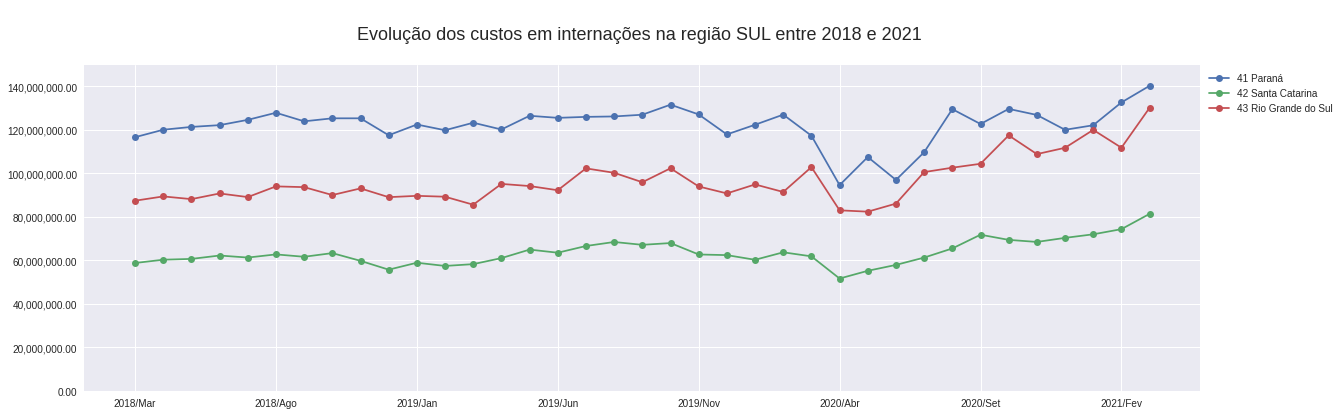

In [14]:
ax = df_valores_sul_range.T.plot(figsize=(20,6), marker='o')
plt.title('\nEvolução dos custos em internações na região SUL entre 2018 e 2021 \n', fontsize=18)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.ylim(0, 150000000)
plt.show()

Com a linha do tempo, podemos notar uma queda na quantidade de internações em **Abril de 2020** nos três estados da região, consequentemente diminuindo o valor gasto com as internações.

- Essa queda pode ter como fator a pandemia do COVID-19?

Iremos analisar cada estado de forma separada a partir dessa data:
<br>


* **Paraná**
> Após a queda de Abril de 2020, o estado teve um pico no mês de Maio elevando o valor. Existe então uma queda em Junho, porém nos meses seguintes existe uma crescente no número de internações de maneira que não é proporcional ao valor, este aumentando.<br>
Após a queda, o estado do Paraná tem um primeiro pico de internações no mês de Maio, caindo no mês de Junho, da mesma forma os valores vem em uma crescente, porém mais acentuada que o número de internações.<br>
  * Esse aumento de valor, é um reflexo do encarecimento de uma internação?
---
<br>

* **Rio Grande do Sul**
>Após a queda de Abril de 2020, o estado não teve uma oscilação de internações até o mês de Outubro, onde registrou seu primeiro pico. O valor acompanhou essa subida, porém diferentemente das internações que foram reduzidas, o valor continuou subindo.
  * Os valores gastos, ficaram próximos ao Paraná, existe alguma relação?
---
<br>

* **Santa Catarina**
> Após a queda de Abril de 2020, o estado manteve o número de internações até o final do período do estudo, entretando o valor gasto foi aumentando mês a mês até Setembro. Nos meses seguintes, o valor abaixou, mas voltou a subir novamente em Novembro, ficando dessa maneira até o fim do periodo.
----
<br>

* **Conclusão**

>Após esse levantamento, vimos que a quantidade de internações, não condizem com os valores gastos, onde estes podem estar relacionados ao alto custo da manutenção devido ao COVID-19.
Não é possível identificar uma possível queda, apenas uma crescente.